In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [8]:
%env TP_ISAE_DATA = /home/jupyter/data/

env: TP_ISAE_DATA=/home/jupyter/data/


In [9]:
import os,random,shutil

In [41]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/jupyter/data/dataset_fine'
original_dataset_aircraft_dir = '/home/jupyter/data/dataset_fine/aircraft/'
original_dataset_background_dir = '/home/jupyter/data/dataset_fine/background/'

# The directory where we will
# store our smaller dataset
base_dir = '/home/jupyter/data/dataset_fine_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training aircraft pictures
train_aircraft_dir = os.path.join(train_dir, 'aircraft/')
os.mkdir(train_aircraft_dir)

# Directory with our training background pictures
train_background_dir = os.path.join(train_dir, 'background/')
os.mkdir(train_background_dir)

# Directory with our validation aircraft pictures
validation_aircraft_dir = os.path.join(validation_dir, 'aircraft/')
os.mkdir(validation_aircraft_dir)

# Directory with our validation background pictures
validation_background_dir = os.path.join(validation_dir, 'background/')
os.mkdir(validation_background_dir)

# Directory with our validation aircraft pictures
test_aircraft_dir = os.path.join(test_dir, 'aircraft/')
os.mkdir(test_aircraft_dir)

# Directory with our validation background pictures
test_background_dir = os.path.join(test_dir, 'background/')
os.mkdir(test_background_dir)







In [43]:
#copy methode
def copyFile(fileDir,tarDir,nbChoice):
    pathDir=os.listdir(fileDir)
    sample=random.sample(pathDir,nbChoice)
    print (sample)
    for name in sample:
        if(name!='.ipynb_checkpoints'):
            shutil.copyfile(fileDir+name,tarDir+name)

# Copy first 300 aircraft images to train_aircraft_dir

copyFile(original_dataset_aircraft_dir,train_aircraft_dir,300)


# Copy next 100 aircraft images to validation_aircraft_dir
copyFile(original_dataset_aircraft_dir,validation_aircraft_dir,100)

# Copy next 100 aircraft images to test_aircraft_dir
copyFile(original_dataset_aircraft_dir,test_aircraft_dir,100)

# Copy first 150 background images to train_background_dir
copyFile(original_dataset_background_dir,train_background_dir,150)


# Copy next 50 background images to validation_background_dir
copyFile(original_dataset_background_dir,validation_background_dir,50)

# Copy next 50 background images to test_background_dir
copyFile(original_dataset_background_dir,test_background_dir,50)


['USGS_AUS_ae43488869f44e152fb73b0024f9cdc53a2508e43507173557a9a442.jpg', 'USGS_ATL_1d6c19938ce5244cf280df45389824006cfd894255517767e88edc37.jpg', 'USGS_ATL_163e5244babffbf7afa60a6f486ae9d8f3c5689d7ad6de9d8fcee193.jpg', 'USGS_ATL_6e3b9945ed7bc0044443bb6fffe03aedf6bb2c562f0593b746a9f04d.jpg', 'USGS_ATL_c04f45366524cdc7ff6b1ed35fb3388808f3668ae6b66f0098b90c98.jpg', 'USGS_ATL_95f6b87a177ae2ab6dbfe8cf1b2752010202a61368a22b7aaee5f685.jpg', 'USGS_AUS_315dc972610a546476c1fd7cc55bace64267e47e58da0a633d7551ca.jpg', 'USGS_AUS_447151252e0539db5b634076e699b9de2289be90c695e7a597091f3d.jpg', 'USGS_ATL_49a9559be13aa7c34c027e34c0febdb69bf2ee2e87f03c5edeae4d3e.jpg', 'USGS_AUS_087cb9fadb64d3b93253e63f739a686d3c1b91652cc8e8b55fd16f9f.jpg', 'USGS_AUS_63a6f3761ca0c63b80424e9f525ab33de3cebcd4fd013171223ce470.jpg', 'USGS_ATL_6009138fb1a289e4c032fb684259c3cd6b8ef3b42c80cec70e30ee82.jpg', 'USGS_ATL_ec4355514dc5c497000077c4e768d61cbc237580e64dd0bc88b815fe.jpg', 'USGS_ATL_8dca604105a0eb49c4a59e7e9d69b6e41b2c5d65

In [44]:
print('total training aircraft images:', len(os.listdir(train_aircraft_dir)))

total training aircraft images: 300


In [45]:
print('total training background images:', len(os.listdir(train_background_dir)))

total training background images: 150


In [46]:
print('total validation aircraft images:', len(os.listdir(validation_aircraft_dir)))

total validation aircraft images: 100


In [47]:
print('total validation background images:', len(os.listdir(validation_background_dir)))

total validation background images: 50


In [48]:
print('total test aircraft images:', len(os.listdir(test_aircraft_dir)))

total test aircraft images: 100


In [49]:
print('total test background images:', len(os.listdir(test_background_dir)))

total test background images: 50


In [53]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         147584    
__________

In [55]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [56]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 100x100
        target_size=(100, 100),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=20,
        class_mode='binary')

Found 450 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [57]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 100, 100, 3)
labels batch shape: (20,)


In [58]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5584 - acc: 0.7025 - val_loss: 0.4539 - val_acc: 0.8457
Epoch 2/30
100/100 [==============================] - 3s 25ms/step - loss: 0.4268 - acc: 0.8500 - val_loss: 0.3529 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 2s 25ms/step - loss: 0.3697 - acc: 0.8700 - val_loss: 0.3404 - val_acc: 0.8926
Epoch 4/30
100/100 [==============================] - 2s 25ms/step - loss: 0.3352 - acc: 0.8845 - val_loss: 0.2879 - val_acc: 0.8839
Epoch 5/30
100/100 [==============================] - 3s 25ms/step - loss: 0.3107 - acc: 0.8905 - val_loss: 0.4583 - val_acc: 0.8202
Epoch 6/30
100/100 [==============================] - 3s 25ms/step - loss: 0.2840 - acc: 0.8940 - val_loss: 0.2533 - val_acc: 0.8957
Epoch 7/30
100/100 [==============================] - 3s 25ms/step - loss: 0.2674 - acc: 0.9055 - val_loss: 0.2727 - val_acc: 0.8968
Epoch 8/30
100/100 [==============================] - 2s 25ms/step - 

In [59]:
model.save('aircrafit_and_background_small_1.h5')

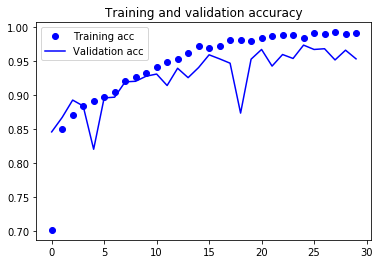

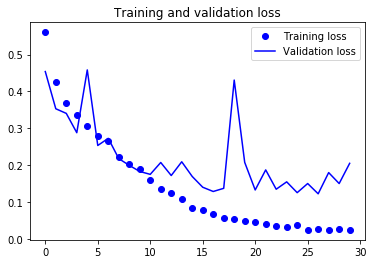

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
